In [0]:
#!unzip air-pollution-in-seoul.zip

In [3]:
import pandas as pd
import numpy as np
import pickle
from sklearn.externals import joblib 
% matplotlib inline
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/My Drive/Dataset/Measurement_summary.csv')
data.head(10)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
5,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.046,0.002,1.1,70.0,61.0
6,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.049,0.002,1.1,66.0,57.0
7,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.045,0.002,1.0,71.0,60.0
8,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.047,0.002,1.1,72.0,60.0
9,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.047,0.002,1.1,74.0,63.0


In [5]:
# Retriving data for station code 104 for PM2.5
data_104=data[(data['Station code']==104) & (data['PM2.5']>0)]
print(len(data_104))
print(data_104.head(10))

25500
       Measurement date  Station code  ...  PM10  PM2.5
77714  2017-01-01 00:00           104  ...  73.0   46.0
77715  2017-01-01 01:00           104  ...  82.0   49.0
77716  2017-01-01 02:00           104  ...  72.0   41.0
77717  2017-01-01 03:00           104  ...  66.0   38.0
77718  2017-01-01 04:00           104  ...  52.0   39.0
77719  2017-01-01 05:00           104  ...  57.0   31.0
77720  2017-01-01 06:00           104  ...  56.0   35.0
77721  2017-01-01 07:00           104  ...  52.0   30.0
77722  2017-01-01 08:00           104  ...  48.0   33.0
77723  2017-01-01 09:00           104  ...  59.0   41.0

[10 rows x 11 columns]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


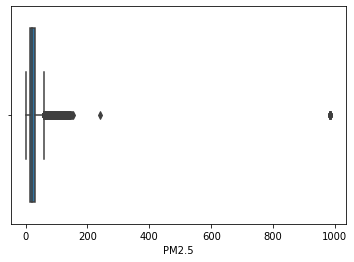

In [6]:
import seaborn as sns
sns.boxplot(data_104['PM2.5'])

25427


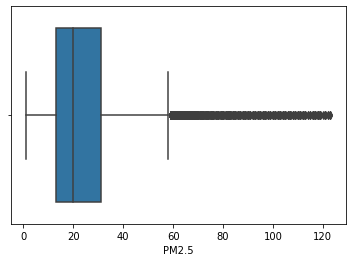

In [7]:
from scipy import stats
z = np.abs(stats.zscore(data_104['PM2.5']))
threshold = 3
#print(len(np.where(z > 3)))
data_104_Rout = data_104[(z < 3)]
print(len(data_104_Rout))
sns.boxplot(data_104_Rout['PM2.5'])

In [8]:
df=data_104_Rout['PM2.5']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)

(25427, 1)


In [9]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))


[1.] [123.]
25427
0.0 1.0000000000000002


In [10]:
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])


25422 [0.36885245901639346, 0.39344262295081966, 0.3278688524590164, 0.30327868852459017, 0.3114754098360656]


In [11]:
matrix=np.matrix(y)
print(matrix.shape)
new_data = pd.DataFrame(matrix,columns=['x1','x2','x3','x4','y'])
new_data.head(10)


(25422, 5)


,x1,x2,x3,x4,y
0,0.368852,0.393443,0.327869,0.303279,0.311475
1,0.393443,0.327869,0.303279,0.311475,0.245902
2,0.327869,0.303279,0.311475,0.245902,0.278689
3,0.303279,0.311475,0.245902,0.278689,0.237705
4,0.311475,0.245902,0.278689,0.237705,0.262295
5,0.245902,0.278689,0.237705,0.262295,0.327869
6,0.278689,0.237705,0.262295,0.327869,0.336066
7,0.237705,0.262295,0.327869,0.336066,0.377049
8,0.262295,0.327869,0.336066,0.377049,0.311475
9,0.327869,0.336066,0.377049,0.311475,0.385246


In [12]:
print(matrix[:,4])

[[0.31147541]
 [0.24590164]
 [0.27868852]
 ...
 [0.08196721]
 [0.10655738]
 [0.09836066]]


In [13]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor_Rout.pkl')
from google.colab import files
files.download('linear_regressor_Rout.pkl')
print(prediction.shape,prediction[0:5])

(8390, 1) [[0.14227554]
 [0.19540428]
 [0.15736235]
 [0.41664692]
 [0.08130532]]


In [14]:
print(model.score(X_train,y_train))
print(model.intercept_)
print(model.coef_)

0.8820935720992048
[0.01057957]
[[ 0.02827587 -0.01551753  0.08020348  0.85108376]]


In [15]:
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

mean squared eror :  0.0021145613487772415
absolute mean error :  0.03206634547238031
0.8877710224511076


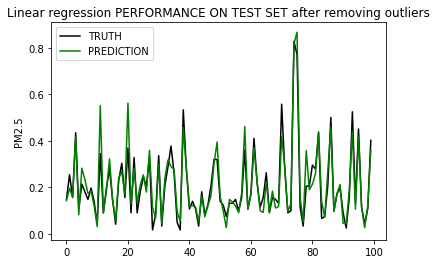

In [16]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET after removing outliers')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

(25500, 1)
[1.] [985.]
25500
0.0 1.0000000000000002
25495 [0.04573170731707318, 0.04878048780487806, 0.04065040650406505, 0.037601626016260166, 0.0386178861788618]
(8414, 1) [[0.03395863]
 [0.05754692]
 [0.0177573 ]
 [0.02004106]
 [0.043035  ]]
mean squared eror :  0.0008975364946575142
absolute mean error :  0.006881601847667103
0.38132571864259246


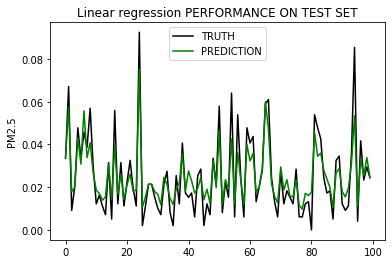

In [17]:
# IMPLEMENTING LINEAR REGRESSION WITHOUT REMOVING OUTLIERS
df=data_104['PM2.5']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])
matrix= np.matrix(y)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor.pkl')
from google.colab import files
files.download('linear_regressor.pkl')
print(prediction.shape,prediction[0:5])
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

In [18]:
# BAYESIAN RIDGE REGRESSION
from sklearn import linear_model
from statsmodels.tsa.ar_model import AR
model = linear_model.BayesianRidge()

model.fit(X_train,y_train )
prediction=model.predict(X_test)
joblib.dump(model,'bayesian_regressor.pkl')
from google.colab import files
files.download('bayesian_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))

print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.0008976994642928034
absolute mean error :  0.006883720725634037
0.38121338324164133


In [19]:
# IMLEMENTING  RANDOM FOREST ALGORITHM
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(max_depth=8, random_state=0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'randomforest_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


mean squared eror :  0.000948772123528577
absolute mean error :  0.005449534286722148
0.34600886405185505


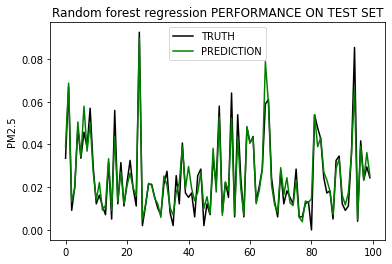

truth :  [[0.03353659]
 [0.06707317]
 [0.00914634]
 [0.0203252 ]
 [0.04776423]
 [0.03353659]
 [0.04573171]
 [0.03861789]
 [0.05691057]
 [0.02947154]]
prediction :  [0.03902523 0.06867437 0.01326897 0.01945165 0.05049075 0.03418699
 0.0578813  0.03684274 0.05001716 0.0270864 ]


In [20]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Random forest regression PERFORMANCE ON TEST SET')
plt.ylabel('PM2.5')
plt.legend()
plt.show()
print('truth : ',y_test[0:10])
print('prediction : ',prediction[0:10])

In [21]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'ridge_regressor.pkl')
from google.colab import files
files.download('ridge_regressor.pkl')
print(mean_squared_error(y_test,prediction))
print(mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))


0.0009097002951022366
0.00704220699923072
0.3729411788010286


In [22]:
# IMPLEMENTING SUPPORT VECTOR
from sklearn.svm import LinearSVR
model= LinearSVR()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.000883645039651291
absolute mean error :  0.0050350387826943515
0.3909011353461366


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


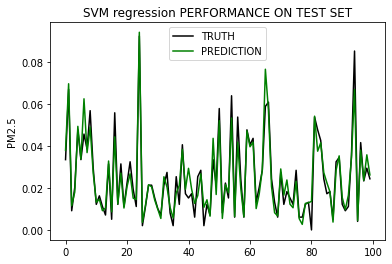

In [23]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('SVM regression PERFORMANCE ON TEST SET')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

In [24]:
# IMPLEMENTING A NEURAL NETWORK
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='relu'))


model.compile(optimizer = "adam", loss ='mse', 
          metrics =["accuracy"])
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
17081/17081 [==============================] - 3s 183us/step - loss: 6.9580e-04 - accuracy: 6.4399e-04
Epoch 2/100
17081/17081 [==============================] - 1s 83us/step - loss: 7.2045e-04 - accuracy: 5.8545e-04
Epoch 3/100
17081/17081 [==============================] - 1s 84us/step - loss: 6.8202e-04 - accuracy: 5.8545e-04
Epoch 4/100
17081/17081 [==============================] - 1s 85us/step - loss: 6.8134e-04 - accuracy: 5.8545e-04
Epoch 5/100
17081/17081 [==============================] - 2s 88us/step - loss: 6.7932e-04 - accuracy: 5.8545e-04
Epoch 6/100
17081/17081 [==============================] - 2s 89us/step - loss: 6.0348e-04 - accuracy: 7.0253e-04
Epoch 7/100
17081/17081 [==============================] - 2s 90us/step - loss: 5.9219e-04 - accuracy: 5.8545e-04
Epoch 8/100
17081/17081 [==============================] - 2s 89us/step - loss: 5.9357e-04 - accuracy: 6.4399e-04
Epoch 9/100
17081/17081 [==============================] - 1s 87us/step - loss: 5.9466e

dict_keys(['loss', 'accuracy'])


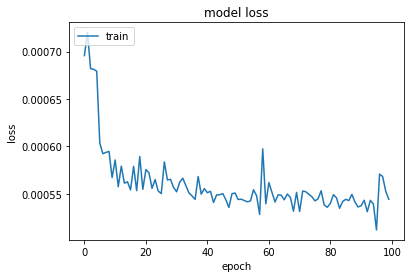

mean squared error :  0.0009507051835882151
mean absolute error :  0.0050350387826943515
0.3909011353461366


In [25]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
y_pred = model.predict(X_test)
print('mean squared error : ',mean_squared_error(y_test,y_pred))
print('mean absolute error : ',mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
#Converting predictions to label


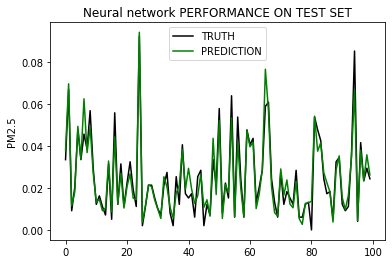

In [26]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Neural network PERFORMANCE ON TEST SET')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

In [27]:
print(X_train)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

print(X_train.shape)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
print(X_train.shape)

[[0.00609756 0.0050813  0.00711382 0.00609756]
 [0.0152439  0.0101626  0.0101626  0.0152439 ]
 [0.0152439  0.01829268 0.01422764 0.01321138]
 ...
 [0.03658537 0.02947154 0.02337398 0.02947154]
 [0.02235772 0.0050813  0.00609756 0.00711382]
 [0.00406504 0.00406504 0.00609756 0.00406504]]
(17081, 4)
(17081, 4, 1)


In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
17081/17081 [==============================] - 18s 1ms/step - loss: 8.3303e-04
Epoch 2/100
17081/17081 [==============================] - 17s 971us/step - loss: 7.1401e-04
Epoch 3/100
17081/17081 [==============================] - 17s 971us/step - loss: 6.4787e-04
Epoch 4/100
17081/17081 [==============================] - 16s 960us/step - loss: 6.3143e-04
Epoch 5/100
17081/17081 [==============================] - 17s 970us/step - loss: 6.3120e-04
Epoch 6/100
17081/17081 [==============================] - 16s 959us/step - loss: 5.9110e-04
Epoch 7/100
17081/17081 [==============================] - 16s 945us/step - loss: 5.8318e-04
Epoch 8/100
17081/17081 [==============================] - 16s 955us/step - loss: 5.7291e-04
Epoch 9/100
17081/17081 [==============================] - 16s 958us/step - loss: 5.7751e-04
Epoch 10/100
17081/17081 [==============================] - 16s 948us/step - loss: 5.7497e-04
Epoch 11/100
17081/17081 [==============================] - 17s 970us/s

dict_keys(['loss'])


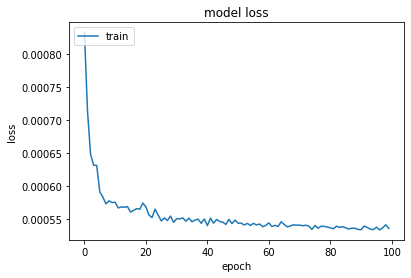

mean square error : 0.0009205569405233221
mean absolute error :  0.005232696897028861
0.36545766437702154


In [29]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
prediction = regressor.predict(X_test)
print("mean square error :" ,mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print("mean absolute error : ",mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

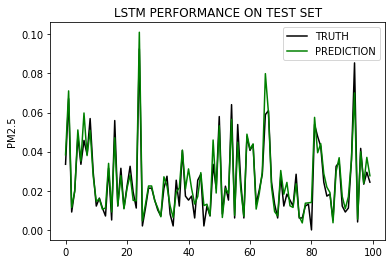

In [30]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('LSTM PERFORMANCE ON TEST SET')
plt.ylabel('PM2.5')
plt.legend()
plt.show()